In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from utils import show_graph

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
def train():
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    history = []
    iterep = 500
    for i in range(iterep * 30):
        x_train, y_train = mnist.train.next_batch(100)
        sess.run(train_step,
                 feed_dict={'x:0': x_train, 
                            'y:0': y_train, 
                            'phase:0': 1})
        if (i + 1) %  iterep == 0:
            epoch = (i + 1)/iterep
            tr = sess.run([loss, accuracy], 
                          feed_dict={'x:0': mnist.train.images,
                                     'y:0': mnist.train.labels,
                                     'phase:0': 1})
            t = sess.run([loss, accuracy], 
                         feed_dict={'x:0': mnist.test.images,
                                    'y:0': mnist.test.labels,
                                    'phase:0': 0})
            history += [[epoch] + tr + t]
            print (history[-1])
    return history

# No batch normalization

In [6]:
def dense(x, size, scope):
    return tf.contrib.layers.fully_connected(x, size, 
                                             activation_fn=None,
                                             scope=scope)

def dense_relu(x, size, scope):
    with tf.variable_scope(scope):
        h1 = dense(x, size, 'dense')
        return tf.nn.relu(h1, 'relu')

In [8]:
tf.reset_default_graph()
x = tf.placeholder('float32', (None, 784), name='x')
y = tf.placeholder('float32', (None, 10), name='y')
phase = tf.placeholder(tf.bool, name='phase')

h1 = dense_relu(x, 100, 'layer1')
h2 = dense_relu(h1, 100, 'layer2')
logits = dense(h2, 10, scope='logits')

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)), 
            'float32'))

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [27]:
show_graph(tf.get_default_graph().as_graph_def())

In [9]:
history = train()

[1.0, 0.59830779, 0.85265452, 0.57221371, 0.8617]
[2.0, 0.41667679, 0.88561821, 0.39574865, 0.8915]
[3.0, 0.35398507, 0.9023273, 0.33720964, 0.9059]
[4.0, 0.32015723, 0.90909094, 0.30497646, 0.91299999]
[5.0, 0.29811373, 0.91529089, 0.28465825, 0.91860002]
[6.0, 0.28326023, 0.91830909, 0.27241373, 0.92199999]
[7.0, 0.26758838, 0.92338181, 0.25921035, 0.92510003]
[8.0, 0.25479254, 0.92689091, 0.24530862, 0.92790002]
[9.0, 0.24456789, 0.92932725, 0.2379601, 0.93099999]
[10.0, 0.23366275, 0.93385452, 0.22769155, 0.93470001]
[11.0, 0.22540689, 0.93559998, 0.219917, 0.93699998]
[12.0, 0.21711729, 0.93694544, 0.21359934, 0.93739998]
[13.0, 0.20877081, 0.93978184, 0.20418589, 0.94069999]
[14.0, 0.20173123, 0.94201821, 0.19956306, 0.94160002]
[15.0, 0.19458182, 0.94429094, 0.19360119, 0.94400001]
[16.0, 0.18984734, 0.94667274, 0.19011484, 0.9447]
[17.0, 0.18258397, 0.94812727, 0.18331048, 0.94590002]
[18.0, 0.17664337, 0.94914544, 0.17872044, 0.94739997]
[19.0, 0.17133054, 0.9508909, 0.1742854

# Standard batch normalization

In [10]:
def dense_batch_relu(x, phase, scope):
    with tf.variable_scope(scope):
        h1 = tf.contrib.layers.fully_connected(x, 100, activation_fn=None, scope='dense')
        h2 = tf.contrib.layers.batch_norm(h1, 
                                          center=True, scale=True, 
                                          is_training=phase,
                                          scope='bn')
        return tf.nn.relu(h2, 'relu')

In [11]:
tf.reset_default_graph()
x = tf.placeholder('float32', (None, 784), name='x')
y = tf.placeholder('float32', (None, 10), name='y')
phase = tf.placeholder(tf.bool, name='phase')

h1 = dense_batch_relu(x, phase,'layer1')
h2 = dense_batch_relu(h1, phase, 'layer2')
logits = dense(h2, 10, 'logits')

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)), 
            'float32'))

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [18]:
show_graph(tf.get_default_graph().as_graph_def())

In [12]:
history_bn = train()

[1.0, 0.39435539, 0.90138179, 1.1792928, 0.88230002]
[2.0, 0.28002357, 0.9260909, 0.72290576, 0.91970003]
[3.0, 0.22777727, 0.93914545, 0.44561943, 0.93440002]
[4.0, 0.19616169, 0.94739997, 0.30019501, 0.94260001]
[5.0, 0.17373104, 0.95334548, 0.2273428, 0.94840002]
[6.0, 0.15647067, 0.95823634, 0.18587565, 0.9526]
[7.0, 0.14240606, 0.96192729, 0.16086385, 0.95779997]
[8.0, 0.13090129, 0.96465456, 0.14966635, 0.95840001]
[9.0, 0.12104727, 0.96794546, 0.13679129, 0.96240002]
[10.0, 0.11268576, 0.97076362, 0.13067156, 0.9637]
[11.0, 0.10519492, 0.97245455, 0.12166423, 0.96450001]
[12.0, 0.098545507, 0.97489089, 0.11837105, 0.96640003]
[13.0, 0.092619263, 0.97623634, 0.11104153, 0.96710002]
[14.0, 0.087022886, 0.97781819, 0.1082375, 0.9677]
[15.0, 0.08229617, 0.97909093, 0.10533465, 0.96829998]
[16.0, 0.077633336, 0.98003638, 0.10114979, 0.97100002]
[17.0, 0.073884636, 0.9817273, 0.10001315, 0.97149998]
[18.0, 0.0701776, 0.98243636, 0.096051663, 0.97219998]
[19.0, 0.066776268, 0.98316365,

# Post-activation batch normalization

In [20]:
def dense_relu_batch(x, phase, scope):
    with tf.variable_scope(scope):
        h1 = dense_relu(x, 100, scope='dense_relu')
        bn = tf.contrib.layers.batch_norm(h1, 
                                          center=True, scale=True, 
                                          is_training=phase,
                                          scope='bn')
        return bn

In [21]:
tf.reset_default_graph()
x = tf.placeholder('float32', (None, 784), name='x')
y = tf.placeholder('float32', (None, 10), name='y')
phase = tf.placeholder(tf.bool, name='phase')

h1 = dense_relu_batch(x, phase,'layer1')
h2 = dense_relu_batch(h1, phase, 'layer2')
logits = dense(h2, 10, 'logits')

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)), 
            'float32'))

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits, y))

In [22]:
show_graph(tf.get_default_graph().as_graph_def())

In [23]:
history_post_bn = train()

[1, 0.29388592, 0.91945457, 1.3046201, 0.83859998]
[2, 0.21552213, 0.94, 0.88956189, 0.89160001]
[3, 0.17754138, 0.95025456, 0.58493733, 0.92720002]
[4, 0.15322003, 0.95767272, 0.3652952, 0.94239998]
[5, 0.13537221, 0.96219999, 0.25398657, 0.94980001]
[6, 0.12123783, 0.96685457, 0.19601743, 0.95420003]
[7, 0.11067251, 0.96939999, 0.15950939, 0.95740002]
[8, 0.10161781, 0.97274548, 0.13935977, 0.96109998]
[9, 0.093822926, 0.97441816, 0.12707961, 0.96270001]
[10, 0.086537801, 0.97712725, 0.11842595, 0.96439999]
[11, 0.080877155, 0.97869092, 0.11453144, 0.96600002]
[12, 0.074531145, 0.9806909, 0.10914696, 0.96649998]
[13, 0.07019005, 0.98194546, 0.10925256, 0.9655]
[14, 0.065838121, 0.98303634, 0.10426167, 0.9673]
[15, 0.061687943, 0.98449093, 0.10245565, 0.96929997]
[16, 0.0579843, 0.98525453, 0.10216489, 0.96780002]
[17, 0.054425441, 0.98647273, 0.099322498, 0.96869999]
[18, 0.051386438, 0.98732728, 0.097551085, 0.9698]
[19, 0.048832081, 0.98809093, 0.095235735, 0.96990001]
[20, 0.04628

# Evaluation

In [13]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [14]:
history = np.array(history)
history_bn = np.array(history_bn)
#history_post_bn = np.array(history_post_bn)

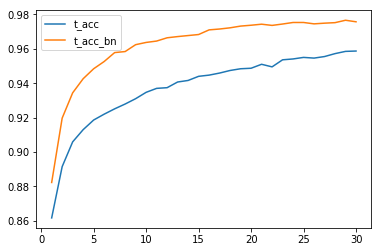

In [15]:
plt.plot(history[:, 0], history[:, -1], label='t_acc')
plt.plot(history_bn[:, 0], history_bn[:, -1], label='t_acc_bn')
#plt.plot(history_post_bn[:, 0], history_post_bn[:, -1], label='t_acc_post_bn')
plt.legend()